<a href="https://colab.research.google.com/github/ag9602/AIB09_Discussion/blob/master/AI_09_Projact1_%EC%95%88%EA%B1%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 목표
#  1. 국가별 선호하는 게임 장르는?
#  2. 연도별 유행하는 장르는?
#  3. 출교량이 높은 게임에 대한 분석 및 시각화 프로세스

In [ ]:
# 데이터 불러오기
import pandas as pd
import numpy as np
data_url = "https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv"
df = pd.read_csv(data_url, index_col= 0)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
# 데이터 결측지 및 타입 확인
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [ ]:
# from selenium import webdriver
# import time
# from bs4 import BeautifulSoup

# driver = webdriver.Chrome('chromedriver.exe')

# # platform name release date로 검색
# for name, platform in zip(names_list, platform_list):
#     driver.get('https://www.google.com/search?q={}'.format(platform + ' ' + name + ' ' +  "release date"))
#     time.sleep(3)
        
#     try: # xxxx년 xx월 xx일 데이터 수집
#         html = driver.page_source
#         soup = BeautifulSoup(html, 'html.parser')
#         date = soup.select('div.Z0LcW.XcVN5d')
#         year = date[0].text.split(" ")[0].replace("년", '').strip()
#         na_years_df.loc[na_years_df.Name.values == name, 'Year'] = int(year)
#     except:
#         try: # x월 x일 x년 데이터 수집
#             html = driver.page_source
#             soup = BeautifulSoup(html, 'html.parser')
#             date = soup.select('div.Z0LcW.XcVN5d')
#             year =date[0].text.split(" ")[-1].strip()
#             na_years_df.loc[na_years_df.Name.values == name, 'Year'] = int(year)
#         except: # 못담을 경우 0으로 처리
#             na_years_df.loc[na_years_df.Name.values == name, 'Year'] = 0
        
# driver.quit()
# na_years_df.to_csv('na_years.csv', index=False) # 수집후 저장

# 참고했던 코드
# 저의 컴퓨터에서는 chrome driver 경로를 찾을 수 없다는 계속되는 오류에 결국 포기..
# 결측치 삭제로 진행

df = df.dropna(axis=0)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
# year 부분 이상값 확인

year = df.Year.unique()
temp = []
for i in year:
    if i <= 1900:
        print(i)
        temp.append(i)

9.0
97.0
11.0
15.0
3.0
96.0
6.0
8.0
1.0
5.0
4.0
10.0
98.0
7.0
16.0
86.0
14.0
95.0
2.0
13.0
0.0
12.0
94.0


In [ ]:
# year 부분 이상치를 같은 서식의 년도로 변환
# 직접 구글링 해본 결과 80보다 큰 게임들은 1900년대 게임이었고 80보다 작은 게임들은 2000년대 게임들이었다.

df.loc[(df.Year.values <= 80), 'Year'] += 2000
df.loc[((df.Year.values >= 80) & (df.Year.values <= 100)), 'Year'] += 1900
df.Year.value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


2009.0    1428
2008.0    1423
2010.0    1253
2007.0    1195
2011.0    1133
2006.0    1005
2005.0     934
2002.0     826
2003.0     774
2004.0     740
2012.0     652
2015.0     611
2014.0     580
2013.0     545
2001.0     480
1998.0     377
2000.0     348
2016.0     342
1999.0     336
1997.0     289
1996.0     262
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       8
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [ ]:
# Sales 이상값 확인
df.NA_Sales.value_counts()

0        4367
0.02      524
0.03      518
0.01      516
0.04      515
         ... 
4100K       1
0.25M       1
0.72M       1
1.3M        1
820K        1
Name: NA_Sales, Length: 489, dtype: int64

In [ ]:
# K값이 들어간 값 추출
df[df.NA_Sales.str.contains('K')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
11,Ford Racing,PS,2001.0,Racing,Empire Interactive,480K,0.33M,0K,0.06
46,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,60K,0.08,0.16,0.03
146,TOCA Race Driver 3,PC,2006.0,Racing,Codemasters,0K,0.02,0,0
879,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009.0,Strategy,Aqua Plus,0K,0,0.04,0
1087,Pro Evolution Soccer 2014,3DS,2013.0,Action,Konami Digital Entertainment,0K,0,0.19,0
...,...,...,...,...,...,...,...,...,...
15648,Championship Manager 2010,PC,2009.0,Sports,Eidos Interactive,0K,0.01,0,0
16195,Vin Diesel: Wheelman,PS3,2009.0,Racing,Ubisoft,120K,0.15,0,0.06
16331,Midway Arcade Treasures,PS2,2003.0,Misc,Midway Games,720K,0.56,0,0.19
16493,Mortal Kombat,PSV,2012.0,Fighting,Warner Bros. Interactive Entertainment,470K,0.18,0,0.12


In [ ]:
# M이 들어간 값 추출
df[df.NA_Sales.str.contains('M')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
448,Medal of Honor: Warfighter,X360,2012.0,Action,Electronic Arts,0.58M,0.47,0.01,0.1
459,F1 2010,PS3,2010.0,Racing,Codemasters,0.25M,0.76,0.08,0.27
578,Mario Kart 64,N64,1996.0,Racing,Nintendo,5.55M,1.94,2.23,0.15
626,The Hobbit,GBA,2003.0,Platform,Vivendi Games,0.14M,0.05,0,0
673,Star Wars The Clone Wars: Lightsaber Duels,Wii,2008.0,Action,LucasArts,1.23M,0.3,0,0.14
...,...,...,...,...,...,...,...,...,...
15987,Juiced 2: Hot Import Nights,PC,2007.0,Racing,THQ,0M,0.01,0,0
16153,Taiko no Tatsujin Wii,Wii,2008.0,Misc,Namco Bandai Games,0M,0,0.67,0
16170,Medal of Honor: Airborne,X360,2007.0,Shooter,Electronic Arts,0.45M,0.53,0.01,0.12
16409,NASCAR 06: Total Team Control,PS2,2005.0,Racing,Electronic Arts,0.53M,0.02,0,0.09


In [ ]:
# M를 기준으로 단위 변환
sales_col = df.columns[5:]

loc_k = df[df.NA_Sales.str.contains('K')].index

for col in sales_col:
    na_k = df.loc[df[col].str.contains('K'), col]
    na_m = df.loc[df[col].str.contains('M'), col]
    na_k = na_k.str.replace('K', '').astype(float) / 1000
    na_m = na_m.str.replace('M', '').astype(float)

    df.loc[df[col].str.contains('K'), col] = na_k.astype(str)
    df.loc[df[col].str.contains('M'), col] = na_m.astype(str)
df.loc[loc_k]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
11,Ford Racing,PS,2001.0,Racing,Empire Interactive,0.48,0.33,0.0,0.06
46,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,0.06,0.08,0.16,0.03
146,TOCA Race Driver 3,PC,2006.0,Racing,Codemasters,0.0,0.02,0,0
879,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009.0,Strategy,Aqua Plus,0.0,0,0.04,0
1087,Pro Evolution Soccer 2014,3DS,2013.0,Action,Konami Digital Entertainment,0.0,0,0.19,0
...,...,...,...,...,...,...,...,...,...
15648,Championship Manager 2010,PC,2009.0,Sports,Eidos Interactive,0.0,0.01,0,0
16195,Vin Diesel: Wheelman,PS3,2009.0,Racing,Ubisoft,0.12,0.15,0,0.06
16331,Midway Arcade Treasures,PS2,2003.0,Misc,Midway Games,0.72,0.56,0,0.19
16493,Mortal Kombat,PSV,2012.0,Fighting,Warner Bros. Interactive Entertainment,0.47,0.18,0,0.12


In [ ]:
# 실수형으로 변환

col = df.columns[-4:]
df[col] = df[col].astype(float)
df.dtypes

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [ ]:
# 전 세계 판매량 column 추가.

global_sales = []
for i in df.index:
    g_sales = df.loc[i, 'NA_Sales' : 'Other_Sales'].sum()
    global_sales.append(round(g_sales, 2))
df['Global_Sales'] = global_sales
df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00,0.14
7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03
8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0.00,0.11,0.01,0.19
9,Imabikisou,PS3,2007.0,Adventure,Sega,0.00,0.00,0.04,0.00,0.04
10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0.00,0.01,0.08


In [ ]:
# 데이터 시각화를 위한 차트 만들기.
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['font.family'] = 'NanumGothic'
plt.rc('axes', unicode_minus=False)
%config InlineBackend.figure_format = 'retina'

In [ ]:
# 차트 데이터 전처리.
temp_genre = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
temp_genre.columns = ['장르', '미국 ', '유럽 ', '일본 ', '기타 ']
temp_grouped = temp_genre.groupby(['장르']).sum()
temp_table = temp_grouped.reset_index()

temp_table.columns = ['장르', '미국 ', '유럽 ', '일본 ', '기타 ']
temp_table

,장르,미국,유럽,일본,기타
0,Action,858.75,513.64,156.60,183.99
1,Adventure,101.79,63.66,51.87,16.70
2,Fighting,220.35,99.90,87.14,36.15
3,Misc,394.73,208.15,104.18,72.64
4,Platform,445.38,200.63,130.53,51.45
5,Puzzle,121.58,50.47,56.24,12.44
6,Racing,354.70,235.02,56.32,76.51
7,Role-Playing,318.76,183.09,342.93,56.73
8,Shooter,574.48,310.23,38.18,101.86
9,Simulation,181.43,112.99,63.54,31.32


In [ ]:
temp_melted = pd.melt(temp_table, id_vars=['장르'], value_vars=temp_table.columns[1:],
                      var_name='판매국가', value_name='판매량')
temp_melted

,장르,판매국가,판매량
0,Action,미국,858.75
1,Adventure,미국,101.79
2,Fighting,미국,220.35
3,Misc,미국,394.73
4,Platform,미국,445.38
5,Puzzle,미국,121.58
6,Racing,미국,354.70
7,Role-Playing,미국,318.76
8,Shooter,미국,574.48
9,Simulation,미국,181.43


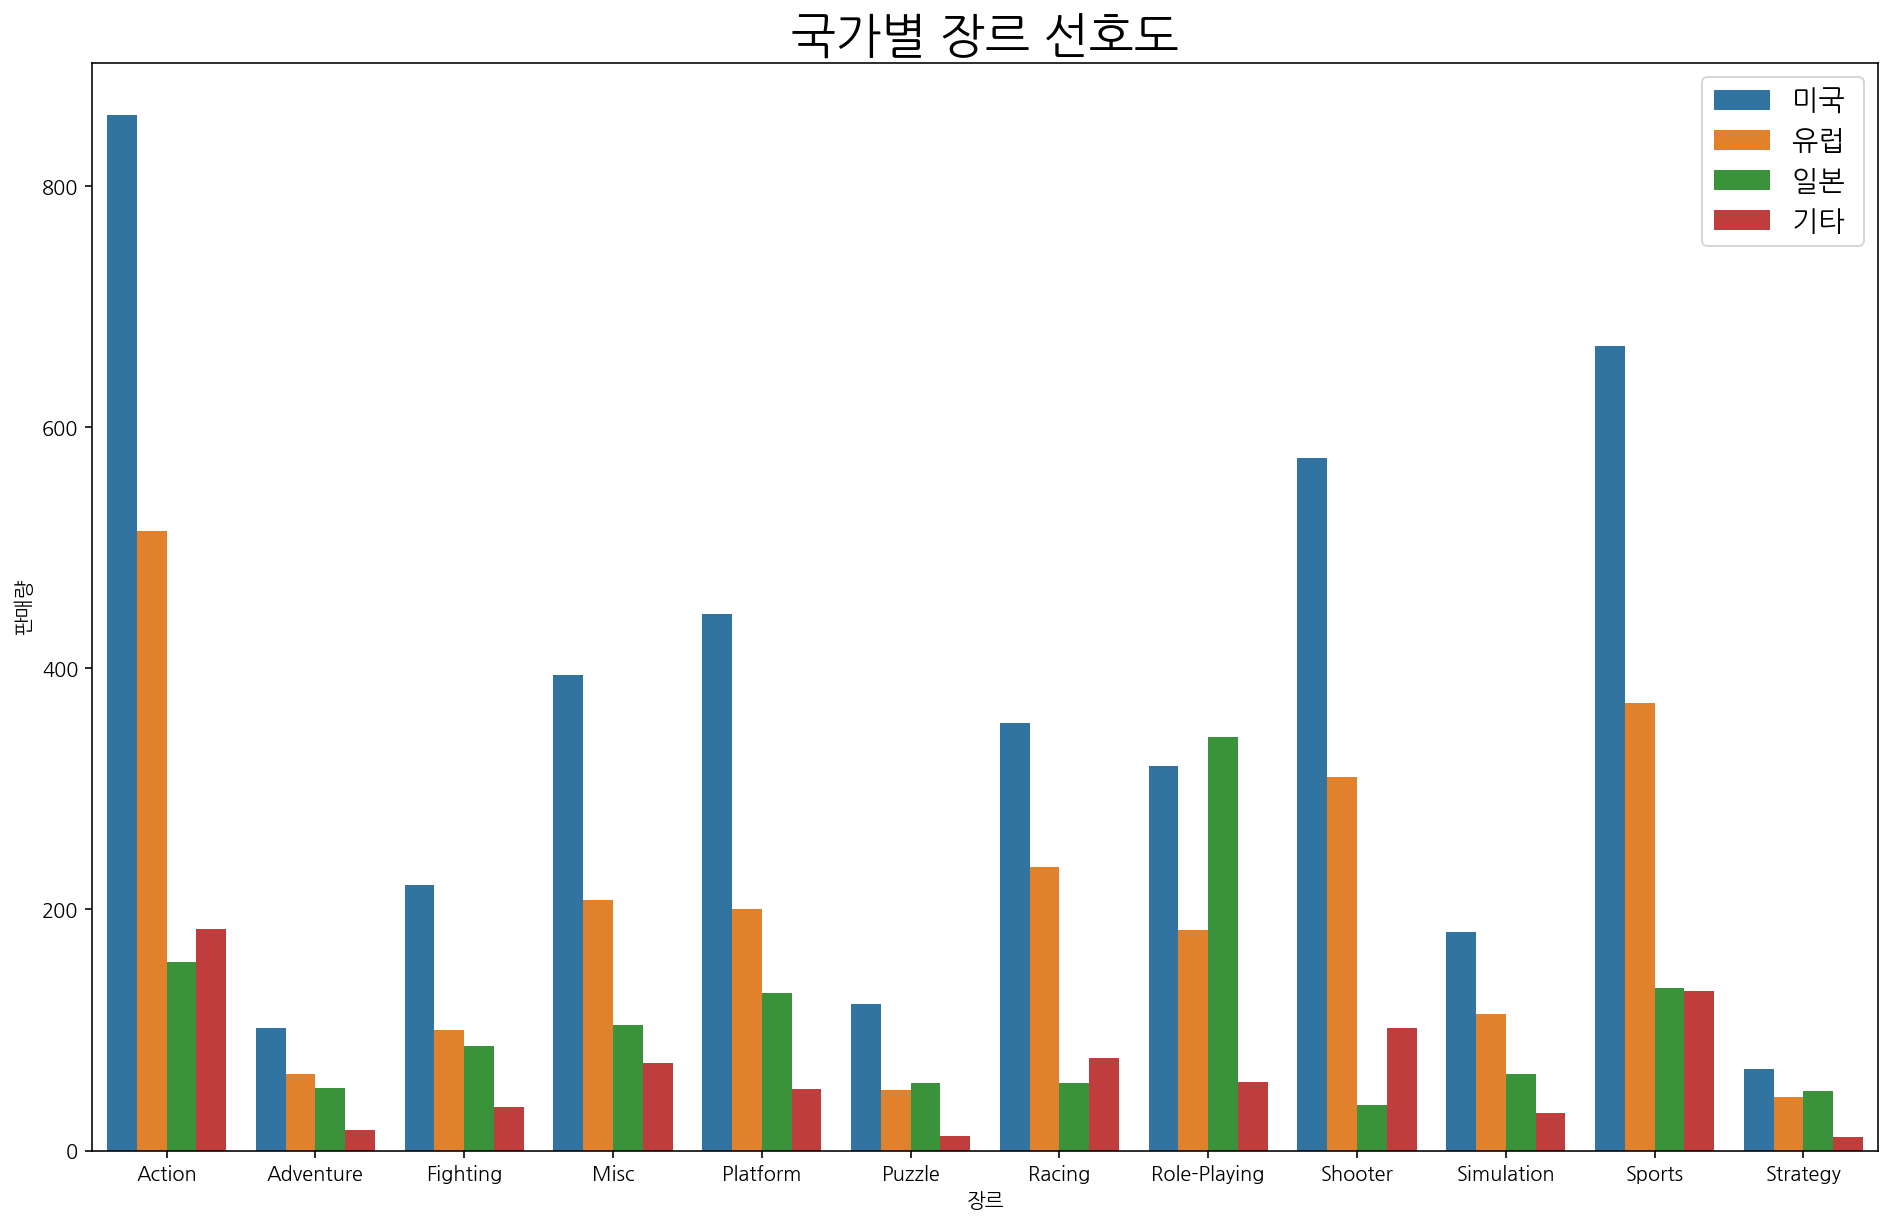

In [ ]:
# 국가별 장르에 따른 게임 판매량 차트.
plt.figure(figsize=(16, 10))
sns.barplot(data=temp_melted, x='장르', y='판매량', hue='판매국가')
plt.title('국가별 장르 선호도', loc='center', fontsize=24)
plt.legend(fontsize=14)
plt.show()

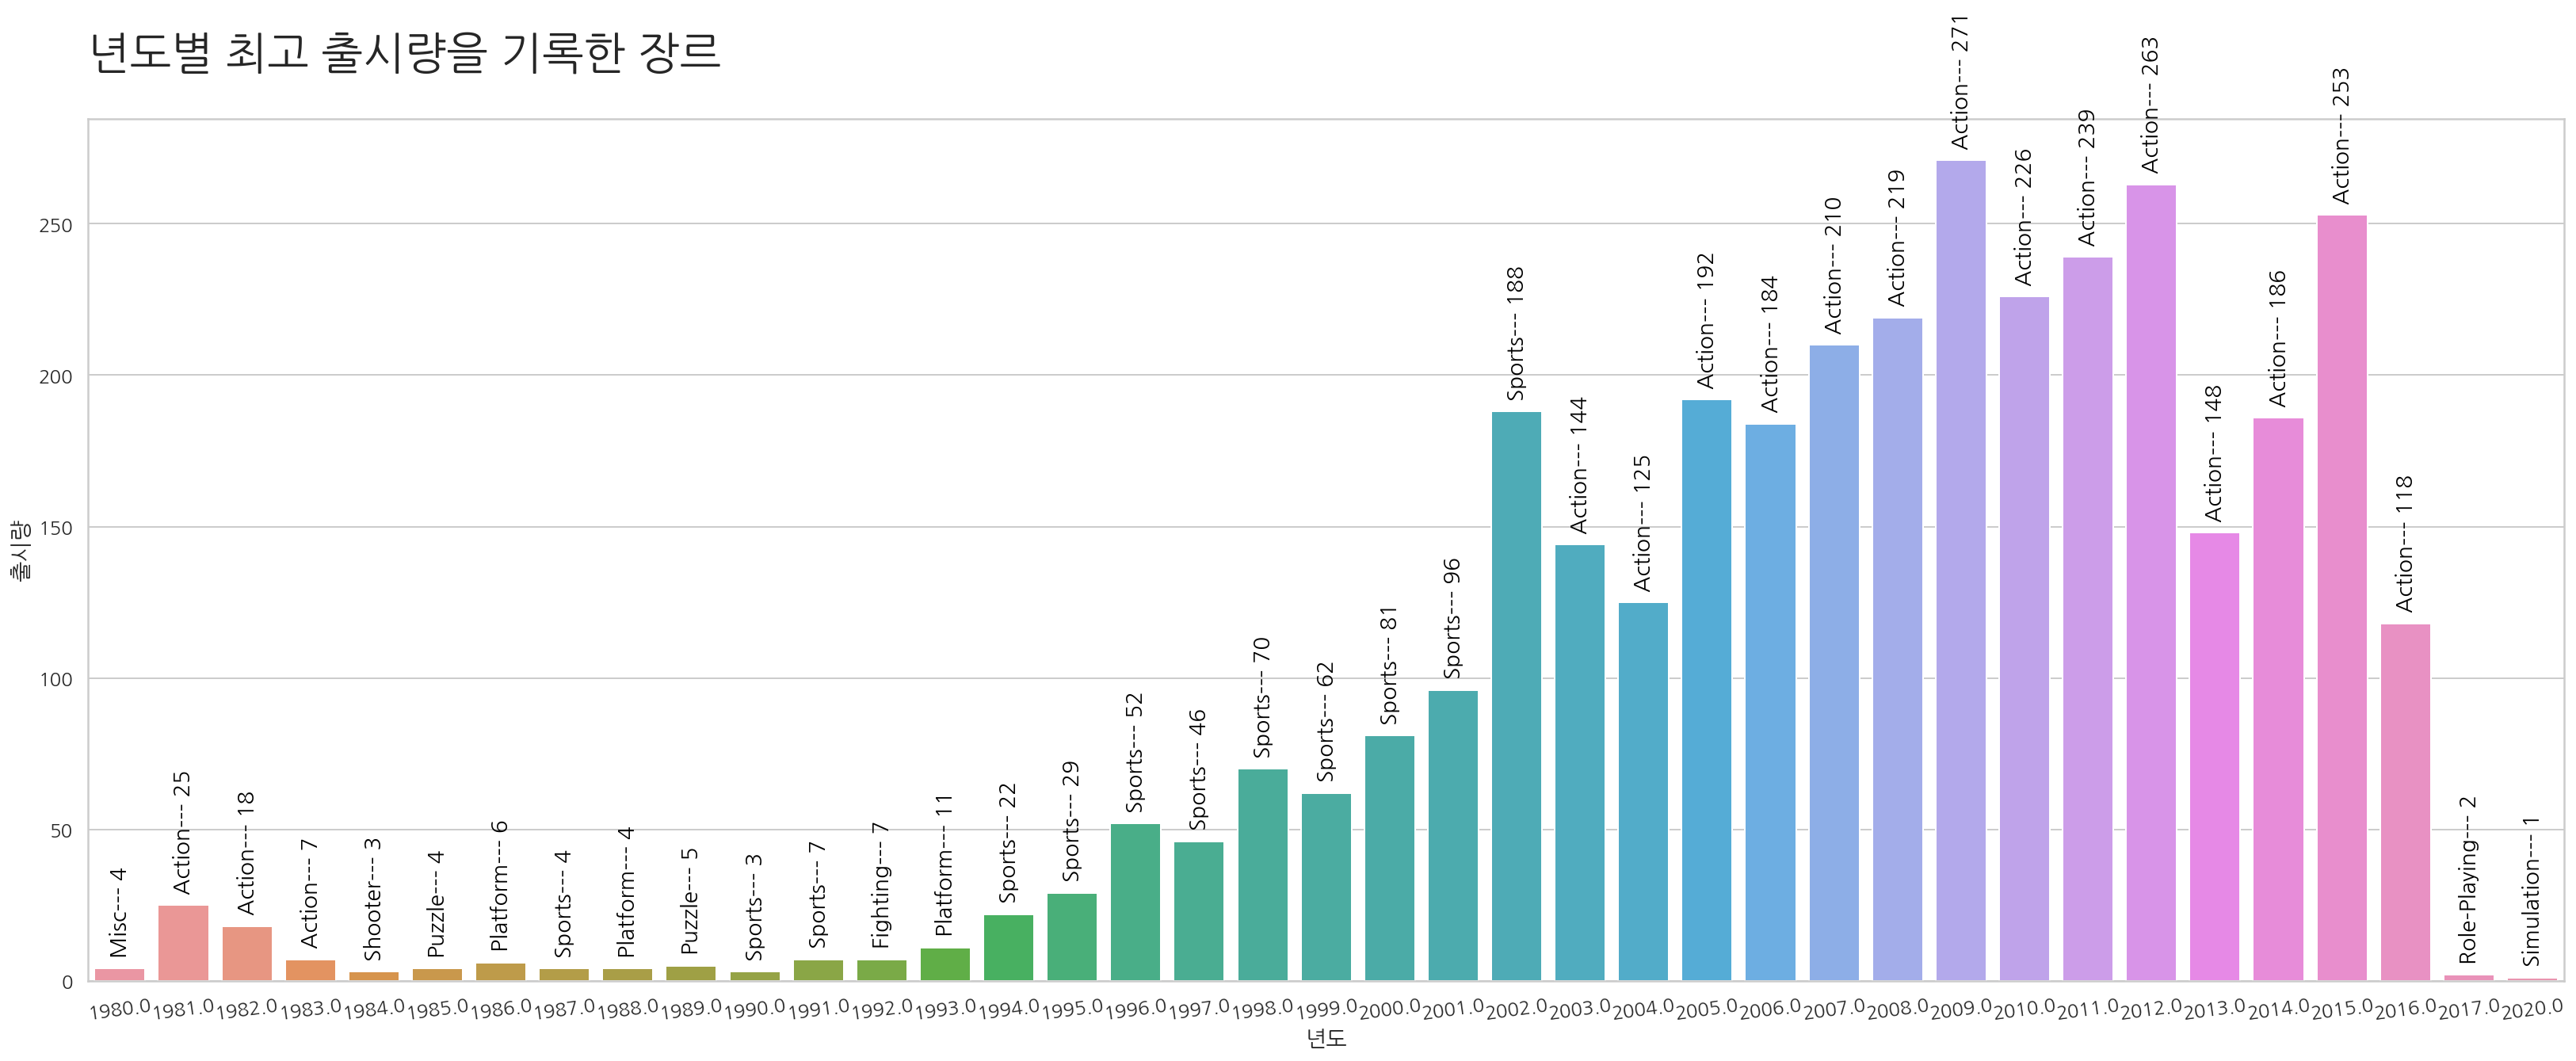

In [ ]:
#년도별 게임 장르의 트렌드

# 년도별 장르 갯수
year_max_df = df.groupby(['Year', 'Genre']).size().reset_index(name='count')
# 가장 값이 큰 값만 뽑기
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
# 중복값 제외하기
year_max_genre = year_max_genre.drop_duplicates(subset=['Year','count'], keep='last').reset_index(drop=True)
year_max_genre[:5]
year_max_genre.columns = ['년도', '장르', '출시량']

# 장르값 할당
genre = year_max_genre['장르'].values

# 년도별 최고 판매량 기록한 장르 데이터프레임 만들기
year_max_sales = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()
condition = year_max_sales['Global_Sales'] == year_max_sales.groupby(['Year'])['Global_Sales'].transform(max)
year_max_sales = year_max_sales[condition]
year_max_sales.columns = ['년도', '장르', '전세계 판매량']
year_max_sales[:5]

sns.set_context('notebook')
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(28,10))
ax = sns.barplot(x='년도', y='출시량', data=year_max_genre)
idx = 0
for value in year_max_genre['출시량']:
    ax.text(x=idx, y=value + 5, s=str(genre[idx] + '---' + ' ' + str(value)),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
plt.xticks(rotation=8, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('년도', fontsize=14)
plt.ylabel('출시량', fontsize=14)
ax.set_title('년도별 최고 출시량을 기록한 장르', fontsize=28, y=1.05, loc='left')
plt.show()